In [8]:
# importación de librerías para el proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# se carga el conjunto de datos directamente desde Google Drive y se visualiza

df = pd.read_csv("C:/Users/U1171860/OneDrive - IQVIA/Desktop/personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [12]:
# vemos si hay nulos y la cantidad que hay en cada columna

df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [13]:
# relleno los valores faltantes de las columnas númericas con la mediana de cada columna

df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median())

df['Social_event_attendance'] = df['Social_event_attendance'].fillna(df['Social_event_attendance'].median())

df['Going_outside'] = df['Going_outside'].fillna(df['Going_outside'].median())

df['Friends_circle_size'] = df['Friends_circle_size'].fillna(df['Friends_circle_size'].median())

df['Post_frequency'] = df['Post_frequency'].fillna(df['Post_frequency'].median())

In [14]:
# chequeo nuevamente si hay valores nulos
df.isnull().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [15]:
# para análisis general, se eliminan aquellos registros que contengan datos vacíos o nulos dentro de las variables categóricas

df.replace('',pd.NA,inplace=True)
df = df.dropna()

In [16]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [17]:
# reemplazo los valores yes y no de las columnas por 1 y 0, respectivamente
df = df.replace({'Yes':1,'No':0})

C:\Users\U1171860\AppData\Local\Temp\ipykernel_30412\2931505878.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes':1,'No':0})


In [18]:
# tomo la columna objetivo "Personality" y la separo del dataset
objetivo = df['Personality']
df.drop('Personality',axis=1,inplace=True)

In [ ]:
# la columna objetivo posee valores categóricos, por lo que cambiamos esas etiquetas a valores númericos enteros y devolvemos una tupla con los
# códigos númericos y su variable categórica correspondiente

if objetivo.dtype == 'object':
  objetivo = pd.factorize(objetivo)[0]

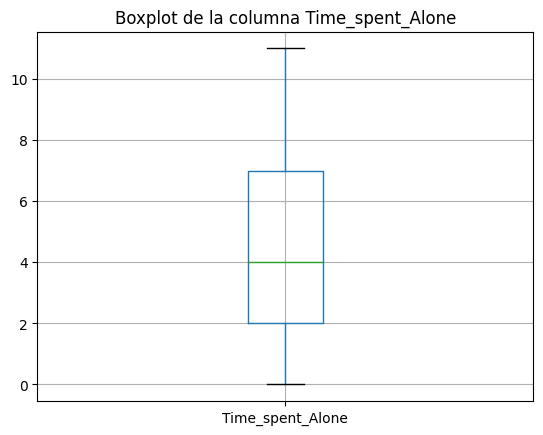

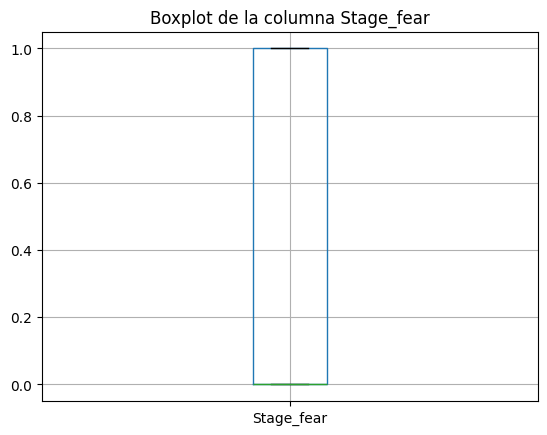

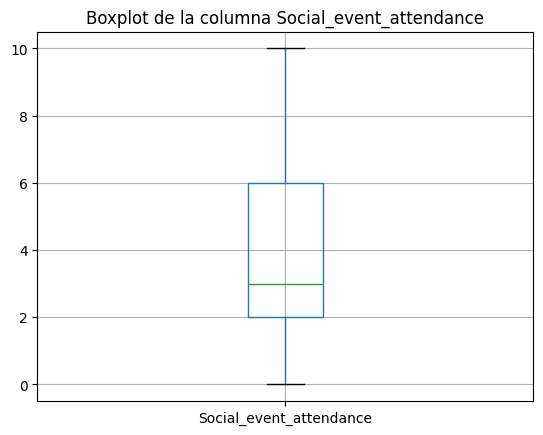

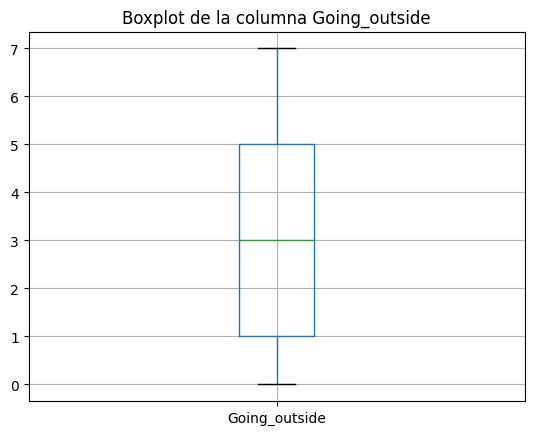

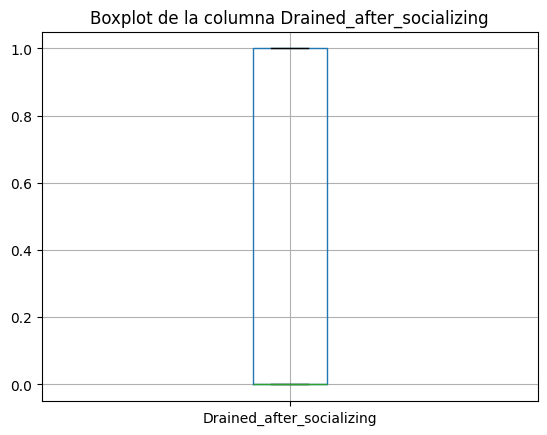

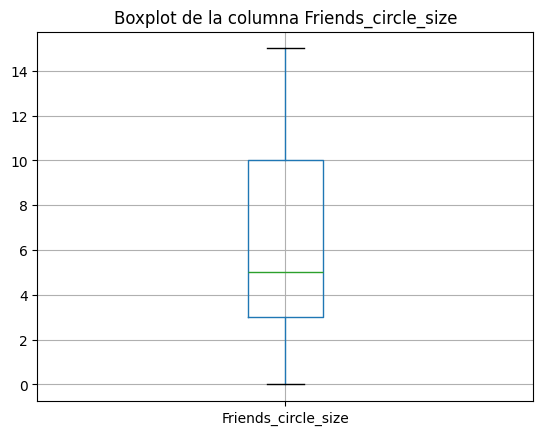

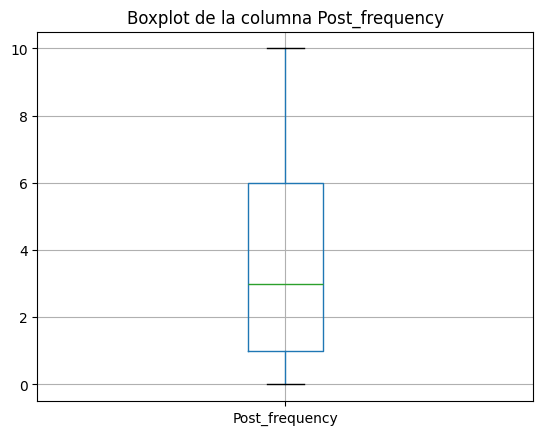

In [20]:
# vemos el boxplot de cada columna para identificar outliers

for col in df.columns:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f"Boxplot de la columna {col}")
  plt.show()

In [21]:
# no hay outliers, por lo que hay algunos modelos que funcionan de manera óptima en esta ocasión, elegimos varios modelos y vemos su funcionamiento
# se escalan los datos con Standard Scaler

X = df
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

In [22]:
# separamos datos en entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(X_escalado,objetivo,random_state=2)

In [ ]:
# modelos
svm = SVC()
l_regression = LogisticRegression(max_iter=1000)
forest = RandomForestClassifier()
kneigh = KNeighborsClassifier()

In [24]:
# entrenamiento de modelos y resultados
# SVM
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred_svm)

In [25]:
# Logistic Regression
l_regression.fit(x_train,y_train)
y_pred_regr = l_regression.predict(x_test)
acc_regr = accuracy_score(y_test,y_pred_regr)

In [26]:
# Random Forests
forest.fit(x_train,y_train)
y_pred_forest = forest.predict(x_test)
acc_forest = accuracy_score(y_test,y_pred_forest)

In [27]:
# KNeighbors
kneigh.fit(x_train,y_train)
y_pred_kneigh = kneigh.predict(x_test)
acc_neigh = accuracy_score(y_test,y_pred_kneigh)

In [28]:
print(f"SMV: Accuracy = {acc_svm}")
print(f"Logistic Regression: Accuracy = {acc_regr}")
print(f"Random Forest: Accuracy = {acc_forest}")
print(f"KNeighbors Classifier: Accuracy = {acc_neigh}")

SMV: Accuracy = 0.9438040345821326
Logistic Regression: Accuracy = 0.9438040345821326
Random Forest: Accuracy = 0.9265129682997119
KNeighbors Classifier: Accuracy = 0.9322766570605188


In [ ]:
# se ve que con todos los modelos se consigue un accuracy mayor al %92, esto quiere decir que todos
# están bien separados y se consiguen buenos resultados

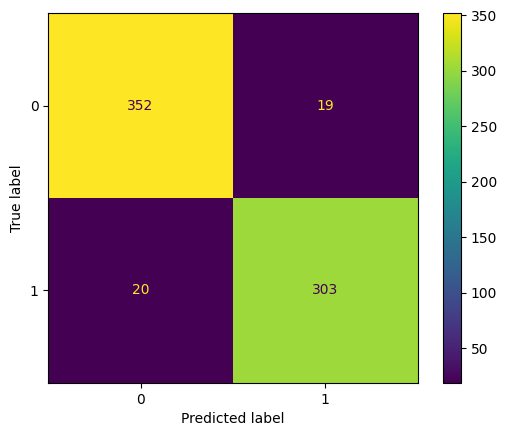

In [34]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
disp_smv = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_smv.plot()
plt.show()

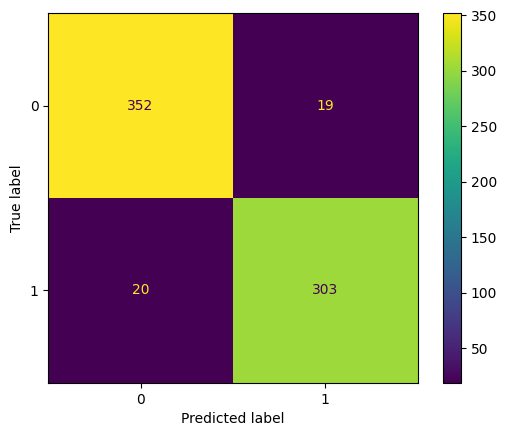

In [35]:
cm_regr = confusion_matrix(y_test,y_pred_regr)
disp_regr = ConfusionMatrixDisplay(confusion_matrix=cm_regr)
disp_regr.plot()
plt.show()

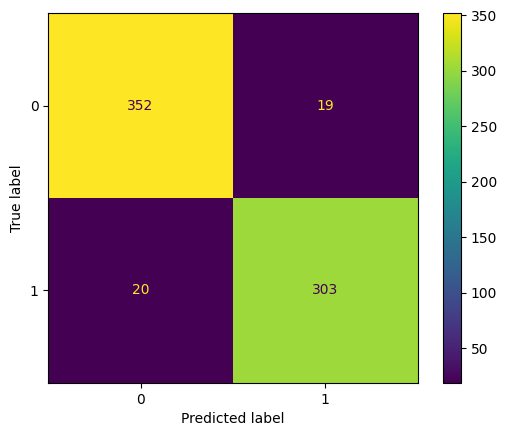

In [ ]:
cm_forest = confusion_matrix(y_test,y_pred_forest)
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp_forest.plot()
plt.show()

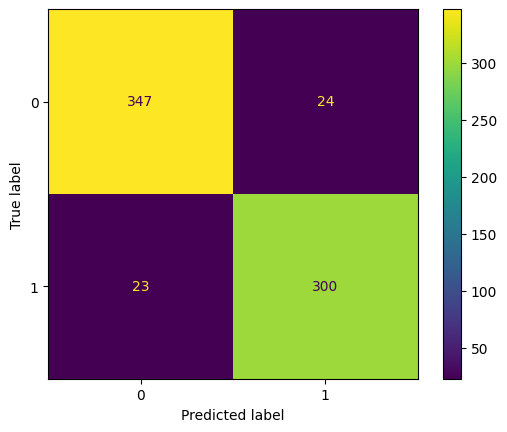

In [37]:
cm_kneigh = confusion_matrix(y_test,y_pred_kneigh)
disp_kneigh = ConfusionMatrixDisplay(confusion_matrix=cm_kneigh)
disp_kneigh.plot()
plt.show()